# Trabajo Práctico N° 2
<br/>

## Curso de Especialización en Inteligencia Artificial
## Visión por computadora 1
<br/>

### Autor: Maximiliano Torti
### Fecha: 16/05/21
<br/>

#### Enunciado:<br/>
Para la imagen suministrada “metal grid ”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con color las direcciones de gradientes más altos

<div style="clear: both">
<img src="img/metalgrid.jpg" style="width: 600px;float:left">
</div>

<div style="clear: both">
</div>

Bonus:

<div style="clear: both">
<img src="img/tela2.jpg" style="width: 600px;float:left">
</div>

In [177]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import cv2 as cv

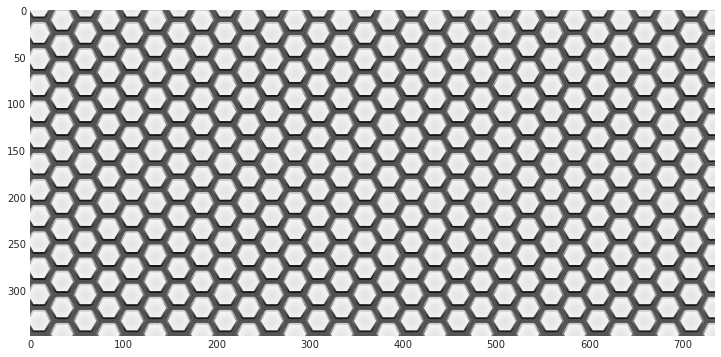

In [178]:
#Cargamos la imagen
metalgrid = cv.imread('img/metalgrid.jpg')
metalgrid_gray = cv.cvtColor(metalgrid, cv.COLOR_BGR2GRAY)
metalgrid_rgb=cv.cvtColor(metalgrid, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,6))
plt.imshow(metalgrid_gray)
plt.grid(False)
plt.show()

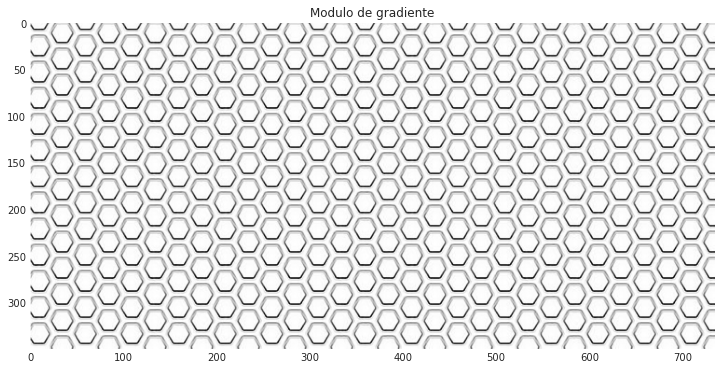

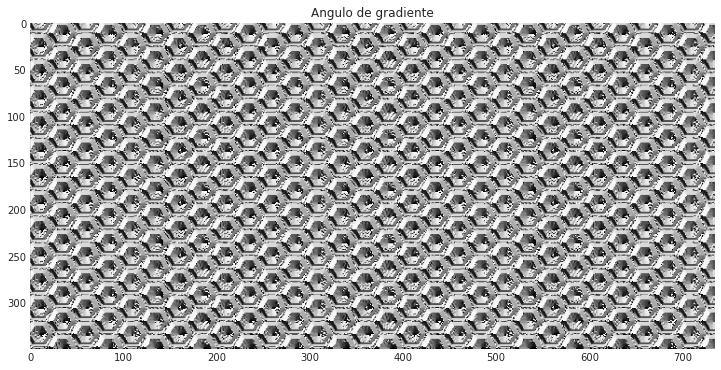

In [179]:
#Aplicamos el filtro de Sobel para obtener Gx y Gy
sobelx_64 = cv.Sobel(metalgrid_gray,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

sobely_64 = cv.Sobel(metalgrid_gray,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

plt.figure(figsize=(20,6))
plt.imshow(mag)
plt.grid(False)
plt.title("Modulo de gradiente")
plt.show()

plt.figure(figsize=(20,6))
plt.imshow(angle)
plt.grid(False)
plt.title("Angulo de gradiente")
plt.show()


In [180]:
#Visualizamos los valores de magnitud de un cubo de 50 pixeles
np.set_printoptions(threshold=np.inf)
print(mag[50:100,50:100])

[[120  14   6  11  13   8   7   4   3   4   4   5   4  11  10   2  14  14
  114 138  74  72  35  11  20   3  38  14 122 196 216 215 215 215 215 215
  215 223 227 192 115  10  51  11   4   2  28  79  71 117]
 [ 60   5   6  16   3   6  12   4   3   3   3   5   4   4  10   6   8  16
   47 154 111  66  52   9  26   8  10  49  48  47  42  39  39  39  39  39
   39  42  49  50  45  47  29   5   4  21  46  65  98 143]
 [ 16   0   7   7   4   5   9   3   2   2   2   4   3   2   7   8   7  11
    4 102 156  91  62  23  13   8  15  25  34  42  47  49  49  49  49  49
   49  49  50  41  27  21   7   6   6  31  48  83 147 118]
 [  8  12  11   2  12   9   3   2   1   0   1   3   2   9   2   7  15   6
    4  31 158 126  56  53  10   8   4   2   6   8   7   0   0   0   0   0
    0   6   9   2   6   8   6   6   2  30  45 118 165  56]
 [  5  16  11   5  14   4   0   2   0   0   0   2   2   7   2   3  15   9
    0  50 171 131  40  44  10   4   4  11   6  11   6   0   0   0   0   0
    0   6   8   1   6   

In [181]:
#Visualizamos los valores de angulo de un cubo de 50 pixeles
print(angle[50:100,0:50])

[[ -90.         -142.4314       22.619864     64.98311     164.0546
     5.8263416    15.255117    145.30484      81.869896     90.
   104.03624     126.25383     130.60129     130.91438     126.25383
   153.43495     156.80139     -37.146687    -25.669876    -24.188677
   -14.950087    -13.038656    -20.282558   -135.          153.43495
    -1.9091524   -25.625858    168.69006     112.75097      95.83009
    91.06546      89.22462      89.743065     89.66591      89.916595
    90.           90.33311      90.66619      90.33311      84.840126
    66.18134      77.82854    -152.8402     -116.56504     135.
   135.         -149.8586     -166.48341    -165.42578    -155.30446   ]
 [ -90.           25.559963     26.56505     149.03624     135.
    13.172553      0.         -146.30992      30.963757     90.
   108.434944    130.23634     130.60129     135.          130.23634
   141.009       124.99202      93.366455    -35.960514    -25.582933
   -21.62789     -23.290115    -23.294561    -4

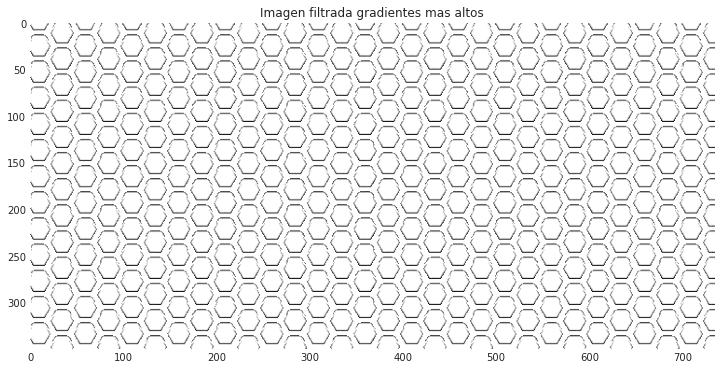

In [182]:
#Basado en los valores anteriores tomo el gradiente alto como >100
grad_filter=mag>100

metalgrid_filtered=metalgrid_gray*grad_filter

plt.figure(figsize=(20,6))
plt.imshow(metalgrid_filtered)
plt.grid(False)
plt.title("Imagen filtrada gradientes mas altos")
plt.show()

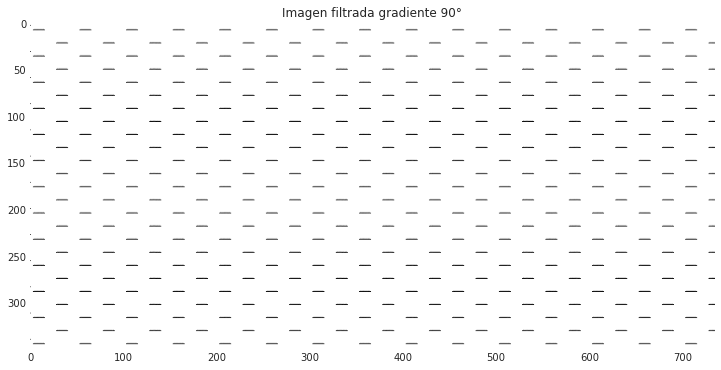

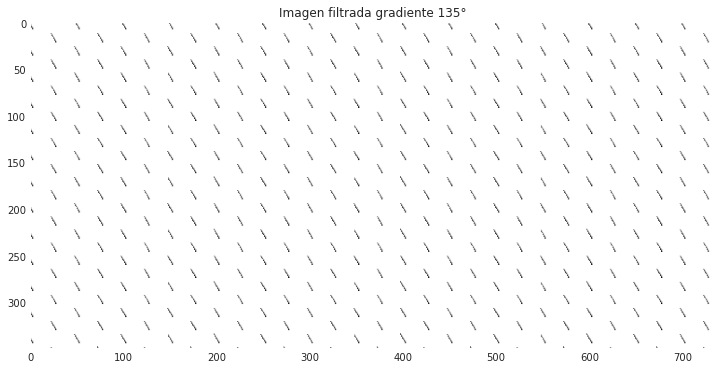

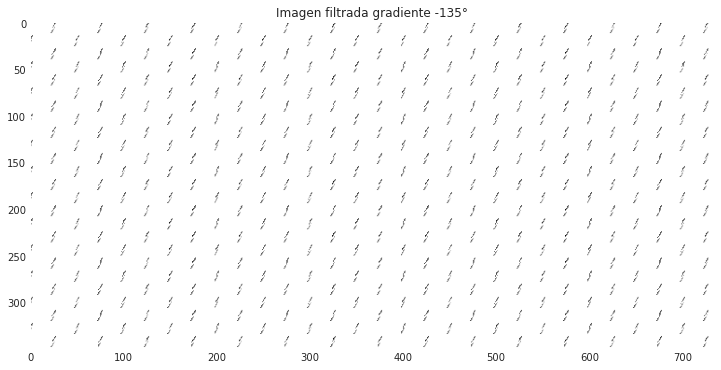

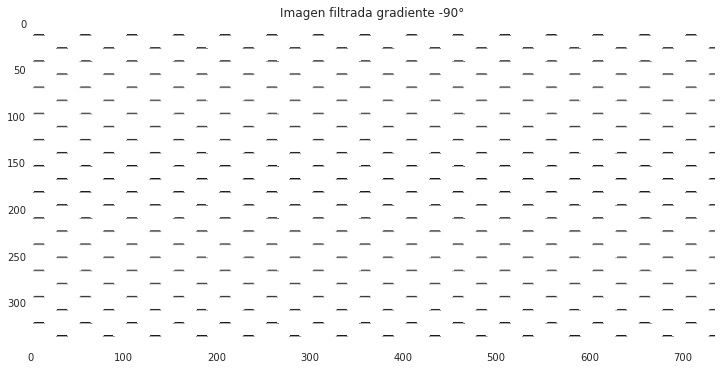

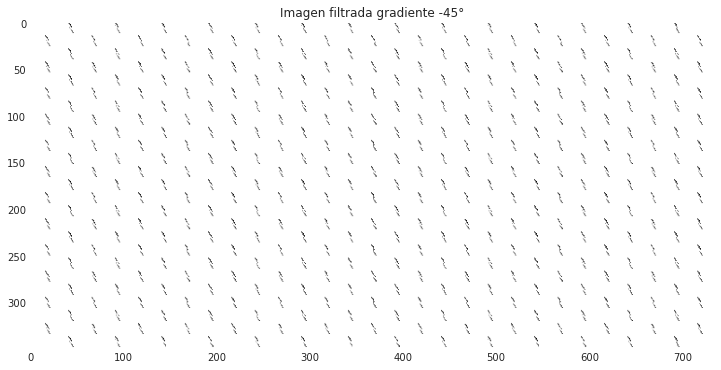

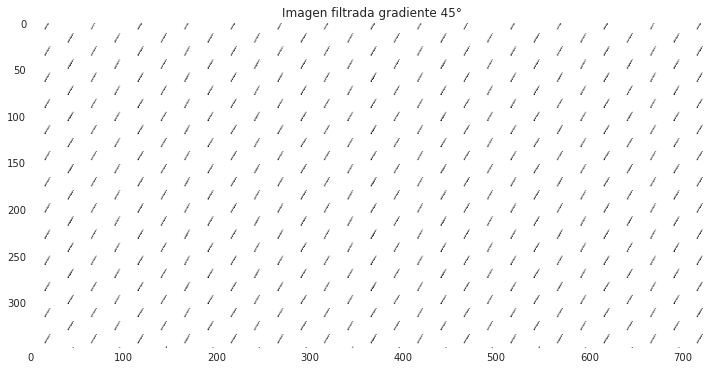

In [183]:
#Partimos los 360grados en 6 cuadrantes de 60°
#Comenzamos por las lineas horizontales, donde el gradiente es 90°
grad_filter_1=(mag>100) & (angle>60) & (angle<120)
metalgrid_filter_1=metalgrid_gray*grad_filter_1
plt.figure( figsize=(20,6))
plt.imshow(metalgrid_filter_1)
plt.grid(False)
plt.title("Imagen filtrada gradiente 90°")
plt.show()

# Cuadrante 2. 135°
grad_filter_2=(mag>100) & (angle>120) & (angle<180)
metalgrid_filter_2=metalgrid_gray*grad_filter_2
plt.figure( figsize=(20,6))
plt.imshow(metalgrid_filter_2)
plt.grid(False)
plt.title("Imagen filtrada gradiente 135°")
plt.show()

# Cuadrante 3. -135°
grad_filter_3=(mag>100) & (angle>-180) & (angle<-120)
metalgrid_filter_3=metalgrid_gray*grad_filter_3
plt.figure( figsize=(20,6))
plt.imshow(metalgrid_filter_3)
plt.grid(False)
plt.title("Imagen filtrada gradiente -135°")
plt.show()

# Cuadrante 4. -90°
grad_filter_4=(mag>100) & (angle>-120) & (angle<-60)
metalgrid_filter_4=metalgrid_gray*grad_filter_4
plt.figure( figsize=(20,6))
plt.imshow(metalgrid_filter_4)
plt.grid(False)
plt.title("Imagen filtrada gradiente -90°")
plt.show()

# Cuadrante 5. -45°
grad_filter_5=(mag>100) & (angle>-60) & (angle<0)
metalgrid_filter_5=metalgrid_gray*grad_filter_5
plt.figure( figsize=(20,6))
plt.imshow(metalgrid_filter_5)
plt.grid(False)
plt.title("Imagen filtrada gradiente -45°")
plt.show()

# Cuadrante 6. 45°
grad_filter_6=(mag>100) & (angle>0) & (angle<60)
metalgrid_filter_6=metalgrid_gray*grad_filter_6
plt.figure( figsize=(20,6))
plt.imshow(metalgrid_filter_6)
plt.grid(False)
plt.title("Imagen filtrada gradiente 45°")
plt.show()

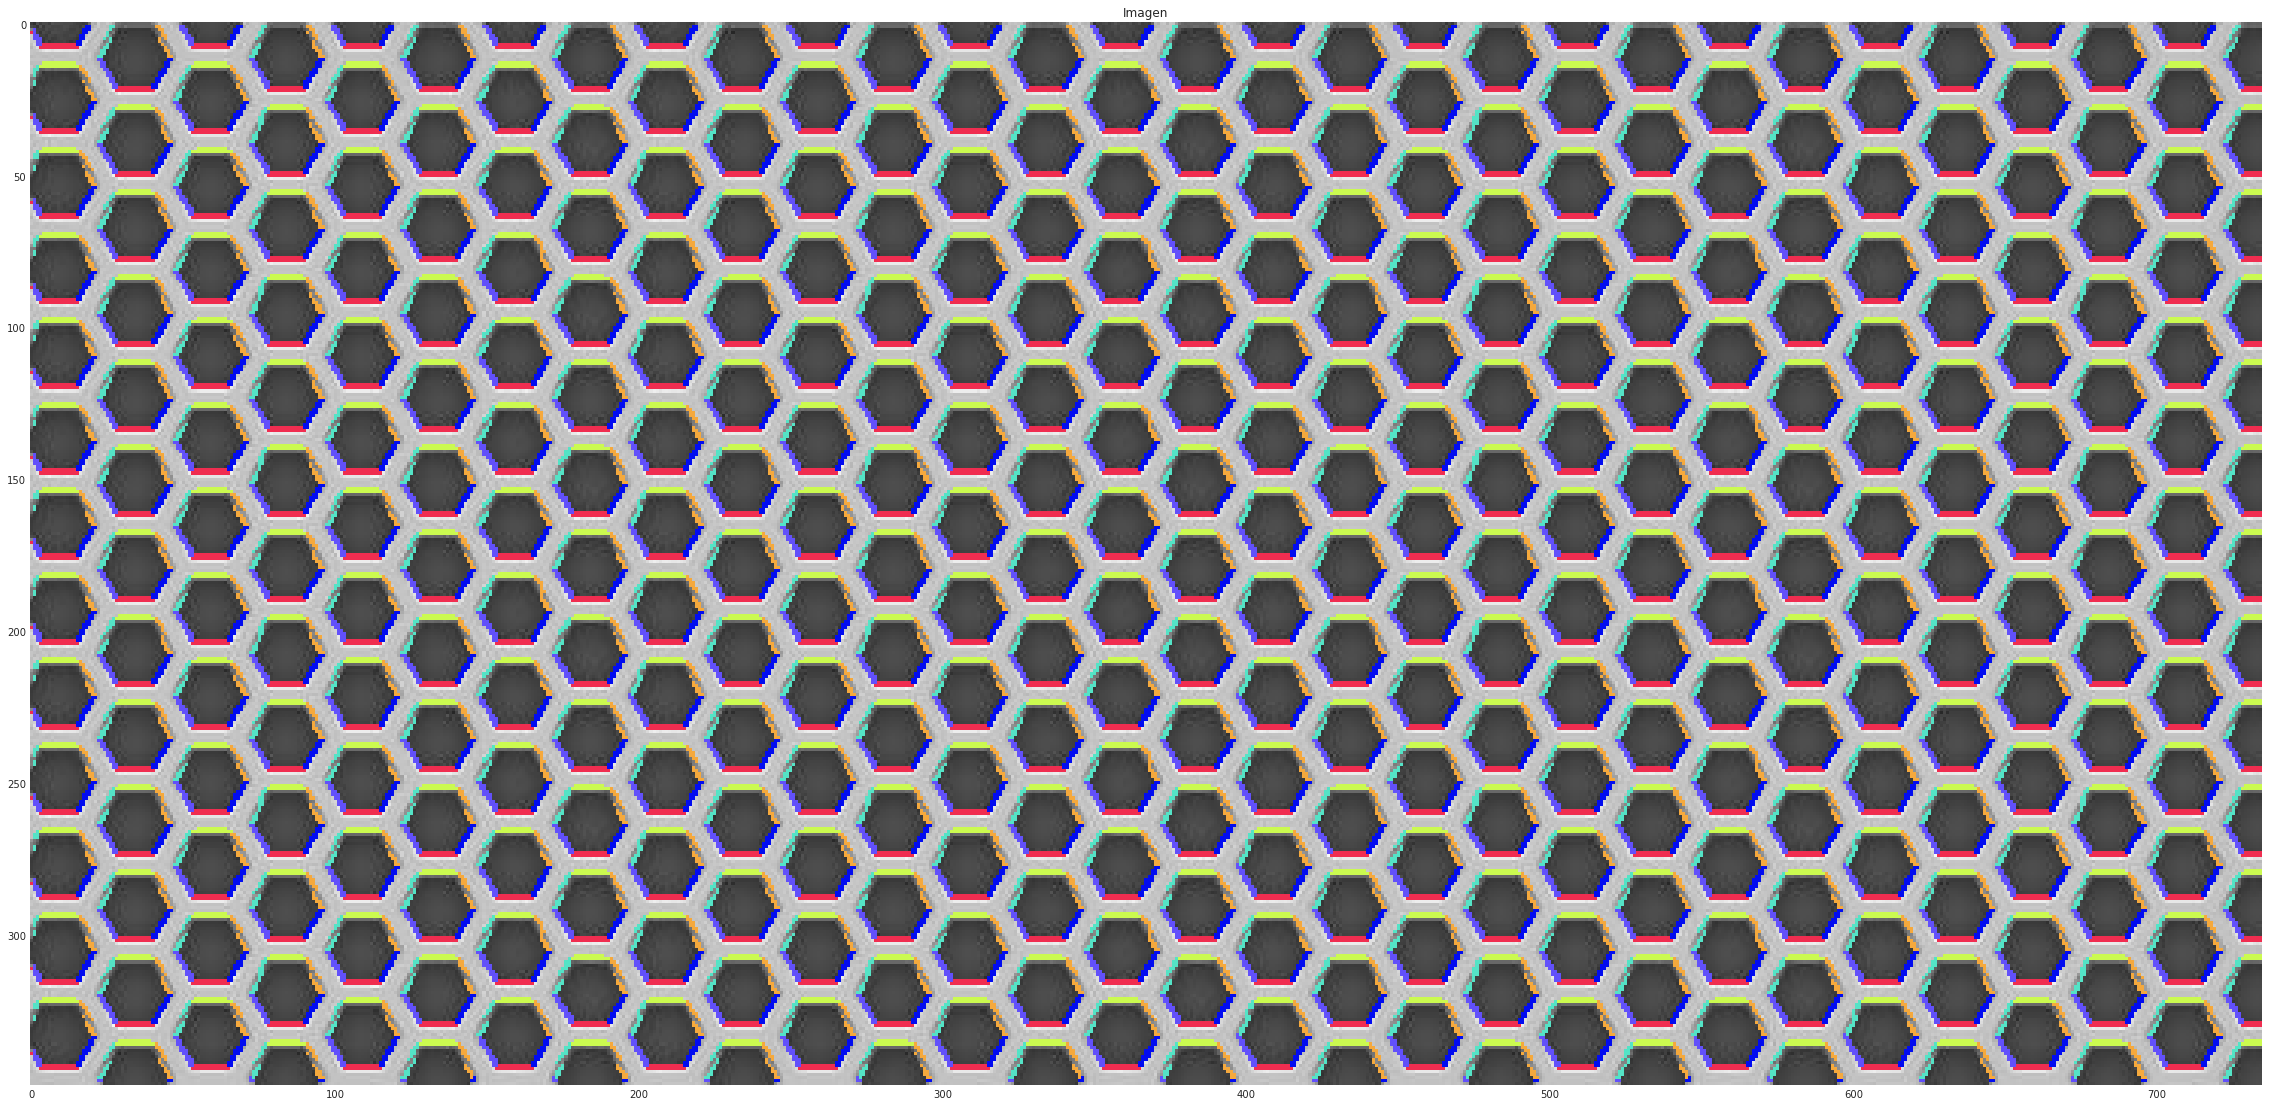

In [184]:
#Creo paleta de 6 colores y aplico la paleta para cada dirección del gradiente
paleta = np.array([[240,45,80],
                   [98,80,250],
                   [84,227,198],
                   [203,250,80],
                   [245,169,61],
                   [2,12,240]])

# Agrego color a la imagen segun los cuadrantes
metalgrid_rgb[grad_filter_1,0]=paleta[0,0]
metalgrid_rgb[grad_filter_1,1]=paleta[0,1]
metalgrid_rgb[grad_filter_1,2]=paleta[0,2]

metalgrid_rgb[grad_filter_2,0]=paleta[1,0]
metalgrid_rgb[grad_filter_2,1]=paleta[1,1]
metalgrid_rgb[grad_filter_2,2]=paleta[1,2]

metalgrid_rgb[grad_filter_3,0]=paleta[2,0]
metalgrid_rgb[grad_filter_3,1]=paleta[2,1]
metalgrid_rgb[grad_filter_3,2]=paleta[2,2]

metalgrid_rgb[grad_filter_4,0]=paleta[3,0]
metalgrid_rgb[grad_filter_4,1]=paleta[3,1]
metalgrid_rgb[grad_filter_4,2]=paleta[3,2]

metalgrid_rgb[grad_filter_5,0]=paleta[4,0]
metalgrid_rgb[grad_filter_5,1]=paleta[4,1]
metalgrid_rgb[grad_filter_5,2]=paleta[4,2]

metalgrid_rgb[grad_filter_6,0]=paleta[5,0]
metalgrid_rgb[grad_filter_6,1]=paleta[5,1]
metalgrid_rgb[grad_filter_6,2]=paleta[5,2]

plt.figure( figsize=(40,40))
plt.imshow(metalgrid_rgb)
plt.grid(False)
plt.title("Imagen")
plt.show()

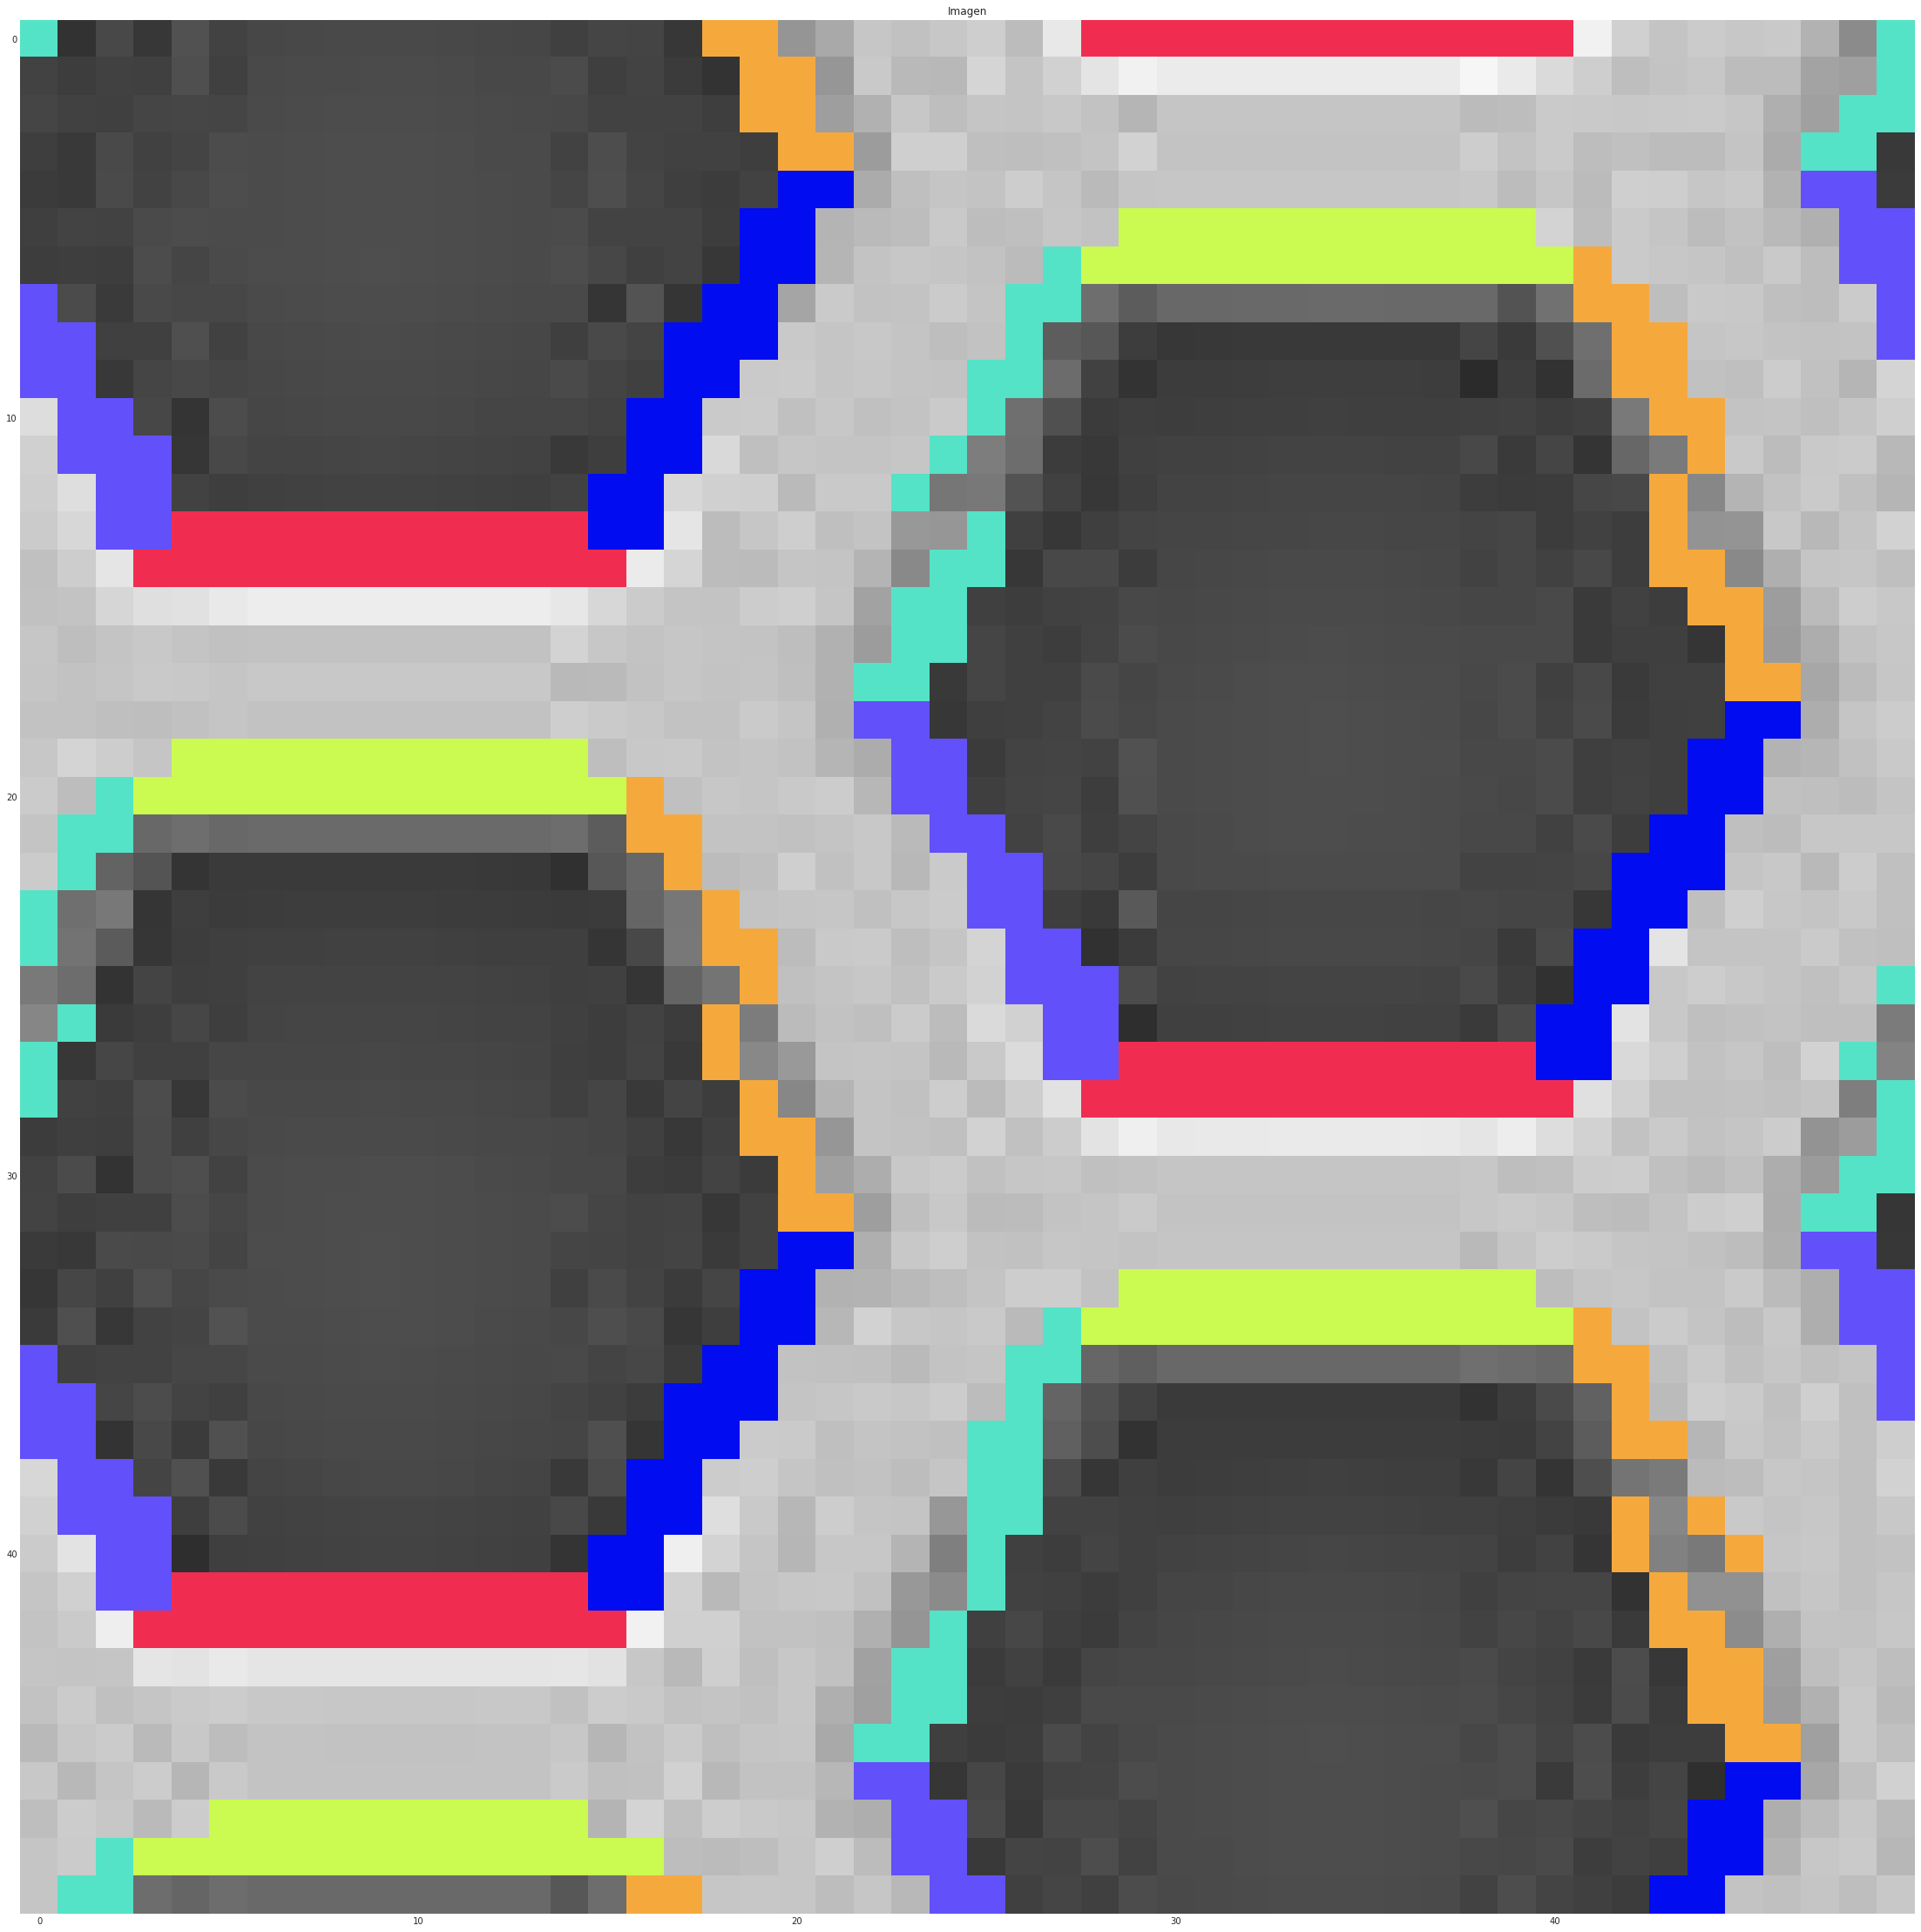

In [185]:
#Ampliamos la imagen para observar el detalle
plt.figure( figsize=(40,40))
plt.imshow(metalgrid_rgb[50:100,50:100])
plt.grid(False)
plt.title("Imagen")
plt.show()

Se observa que la se han encontrado perfectamente los bordes horizontales, tanto los blanco a negro como negro a blanco. 
<br>

Los bordes de +-45° se encontraron con una menor calidad de detección pero aún asi fueron reconocidos.

### BONUS
Intentamos aplicar la misma lógica en la imagen de la telaraña

In [186]:
spydergrid = cv.imread('img/tela2.jpg')
spydergrid_gray = cv.cvtColor(spydergrid, cv.COLOR_BGR2GRAY)
spydergrid_rgb=cv.cvtColor(spydergrid, cv.COLOR_BGR2RGB)

#Aplicamos el filtro de Sobel para obtener Gx y Gy
sobelx_64 = cv.Sobel(spydergrid_gray,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

sobely_64 = cv.Sobel(spydergrid_gray,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

print(mag[0:50,0:50])


[[  0   0   0   0   0   0   0   0   0   2   1   1   1   1   1   2   3   0
    1   6   7   6   5   5   5   6   6   5   5   6   5   4   2   4   5   2
    0   2   1   2   5   4   2   1   2   2   2   5   4   2]
 [  7   7   6   5   4   4   3   2   3   4   4   4   4   3   3   3   4   1
    1   6   7   7   6   6   5   6   6   5   6   6   6   5   4   6   8   6
    4   4   3   3   5   6   4   3   2   3   4   5   3   3]
 [  5   5   6   6   5   4   4   3   3   4   4   4   4   4   3   2   3   2
    1   5   6   6   7   6   5   5   4   5   6   6   6   5   4   4   6   4
    3   3   2   2   4   3   3   3   3   3   4   5   2   2]
 [  3   3   4   4   4   4   4   3   2   2   2   1   3   4   3   3   3   3
    3   6   6   5   6   7   6   6   3   4   6   6   6   6   4   4   6   4
    3   3   3   4   4   3   4   4   5   5   3   4   4   3]
 [  2   2   3   4   4   3   4   2   1   2   3   1   1   4   3   3   3   3
    3   6   7   5   6   6   7   7   6   6   6   7   7   7   6   5   6   6
    5   4   4   5   6   

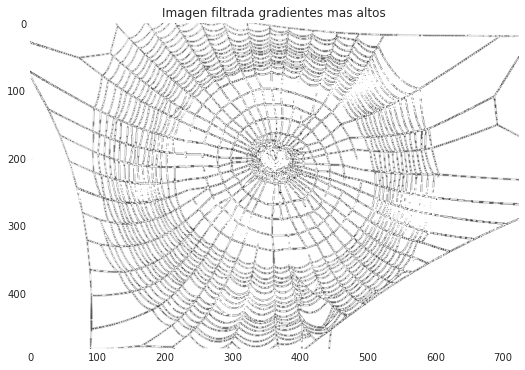

In [187]:
#Basado en los valores anteriores tomo el gradiente alto como >50
grad_filter=mag>50

spydergrid_filtered=spydergrid_gray*grad_filter

plt.figure(figsize=(20,6))
plt.imshow(spydergrid_filtered)
plt.grid(False)
plt.title("Imagen filtrada gradientes mas altos")
plt.show()

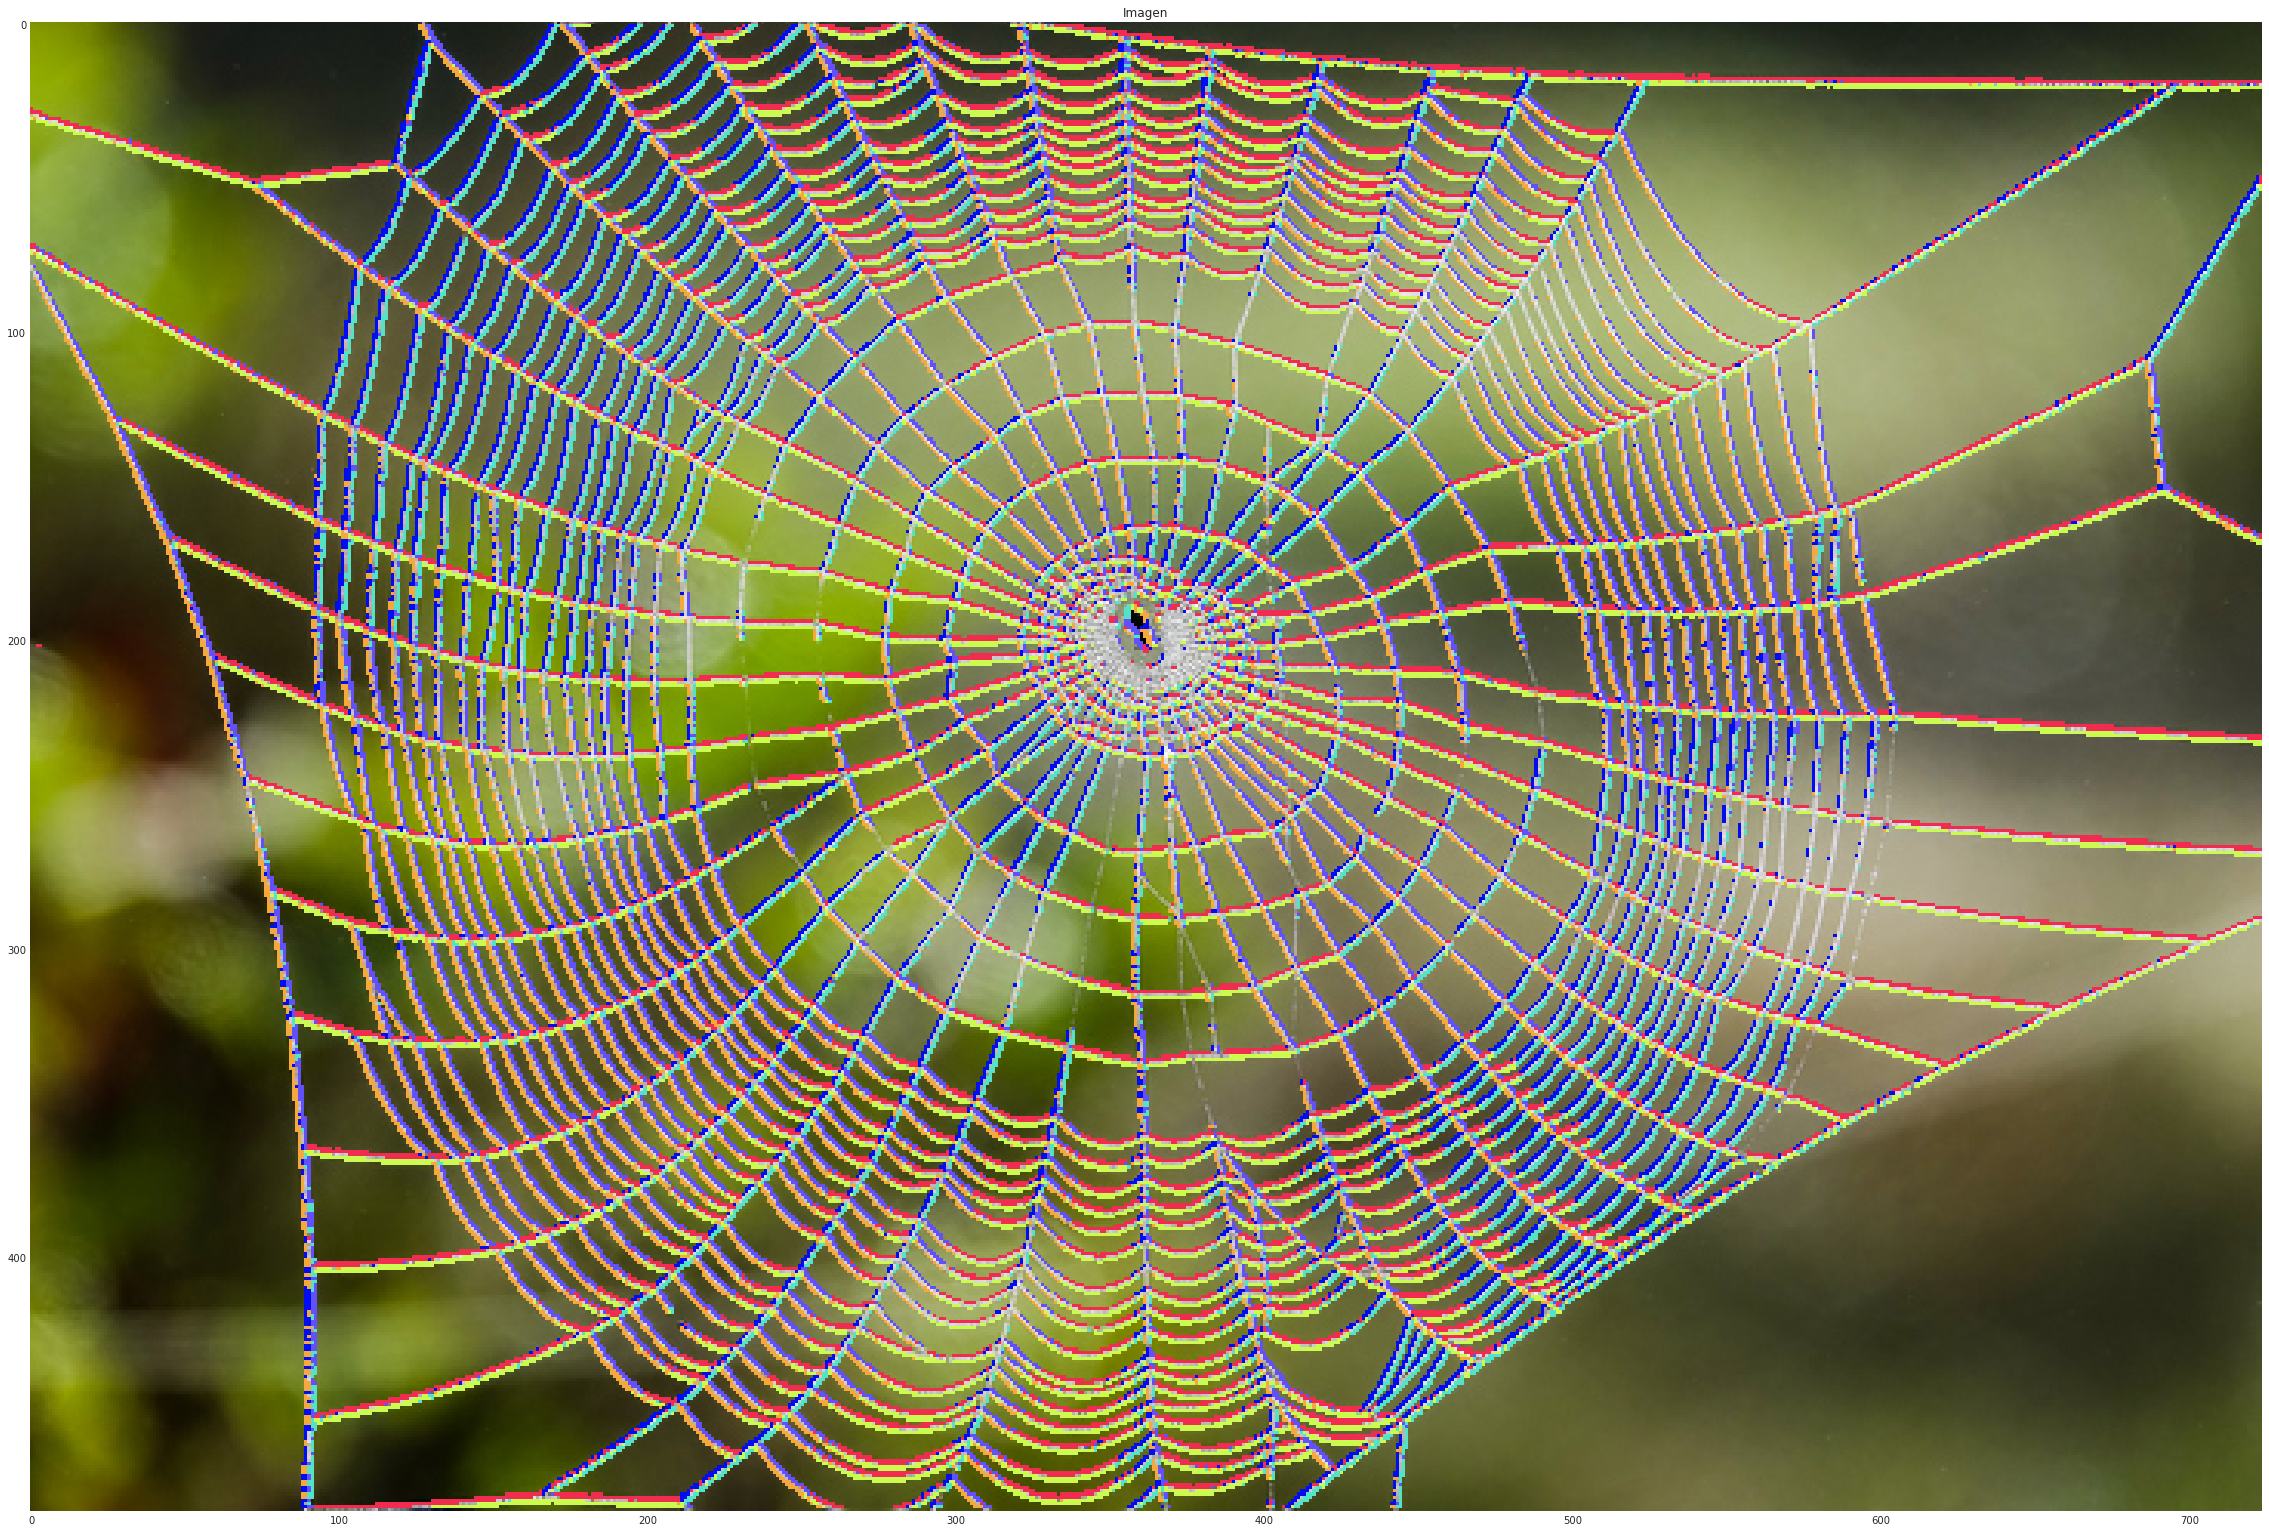

In [188]:
#Partimos los 360grados en 6 cuadrantes de 60°
#Comenzamos por las lineas horizontales, donde el gradiente es 90°
grad_filter_1=(mag>50) & (angle>60) & (angle<120)
spydergrid_filter_1=spydergrid_gray*grad_filter_1

# Cuadrante 2. 135°
grad_filter_2=(mag>50) & (angle>120) & (angle<180)
spydergrid_filter_2=spydergrid_gray*grad_filter_2

# Cuadrante 3. -135°
grad_filter_3=(mag>50) & (angle>-180) & (angle<-120)
spydergrid_filter_3=spydergrid_gray*grad_filter_3

# Cuadrante 4. -90°
grad_filter_4=(mag>50) & (angle>-120) & (angle<-60)
spydergrid_filter_4=spydergrid_gray*grad_filter_4

# Cuadrante 5. -45°
grad_filter_5=(mag>50) & (angle>-60) & (angle<0)
spydergrid_filter_5=spydergrid_gray*grad_filter_5

# Cuadrante 6. 45°
grad_filter_6=(mag>50) & (angle>0) & (angle<60)
spydergrid_filter_6=spydergrid_gray*grad_filter_6

#Creo paleta de 6 colores y aplico la paleta para cada dirección del gradiente
paleta = np.array([[240,45,80],
                   [98,80,250],
                   [84,227,198],
                   [203,250,80],
                   [245,169,61],
                   [2,12,240]])

# Agrego color a la imagen segun los cuadrantes
spydergrid_rgb[grad_filter_1,0]=paleta[0,0]
spydergrid_rgb[grad_filter_1,1]=paleta[0,1]
spydergrid_rgb[grad_filter_1,2]=paleta[0,2]

spydergrid_rgb[grad_filter_2,0]=paleta[1,0]
spydergrid_rgb[grad_filter_2,1]=paleta[1,1]
spydergrid_rgb[grad_filter_2,2]=paleta[1,2]

spydergrid_rgb[grad_filter_3,0]=paleta[2,0]
spydergrid_rgb[grad_filter_3,1]=paleta[2,1]
spydergrid_rgb[grad_filter_3,2]=paleta[2,2]

spydergrid_rgb[grad_filter_4,0]=paleta[3,0]
spydergrid_rgb[grad_filter_4,1]=paleta[3,1]
spydergrid_rgb[grad_filter_4,2]=paleta[3,2]

spydergrid_rgb[grad_filter_5,0]=paleta[4,0]
spydergrid_rgb[grad_filter_5,1]=paleta[4,1]
spydergrid_rgb[grad_filter_5,2]=paleta[4,2]

spydergrid_rgb[grad_filter_6,0]=paleta[5,0]
spydergrid_rgb[grad_filter_6,1]=paleta[5,1]
spydergrid_rgb[grad_filter_6,2]=paleta[5,2]

plt.figure( figsize=(40,40))
plt.imshow(spydergrid_rgb)
plt.grid(False)
plt.title("Imagen")
plt.show()

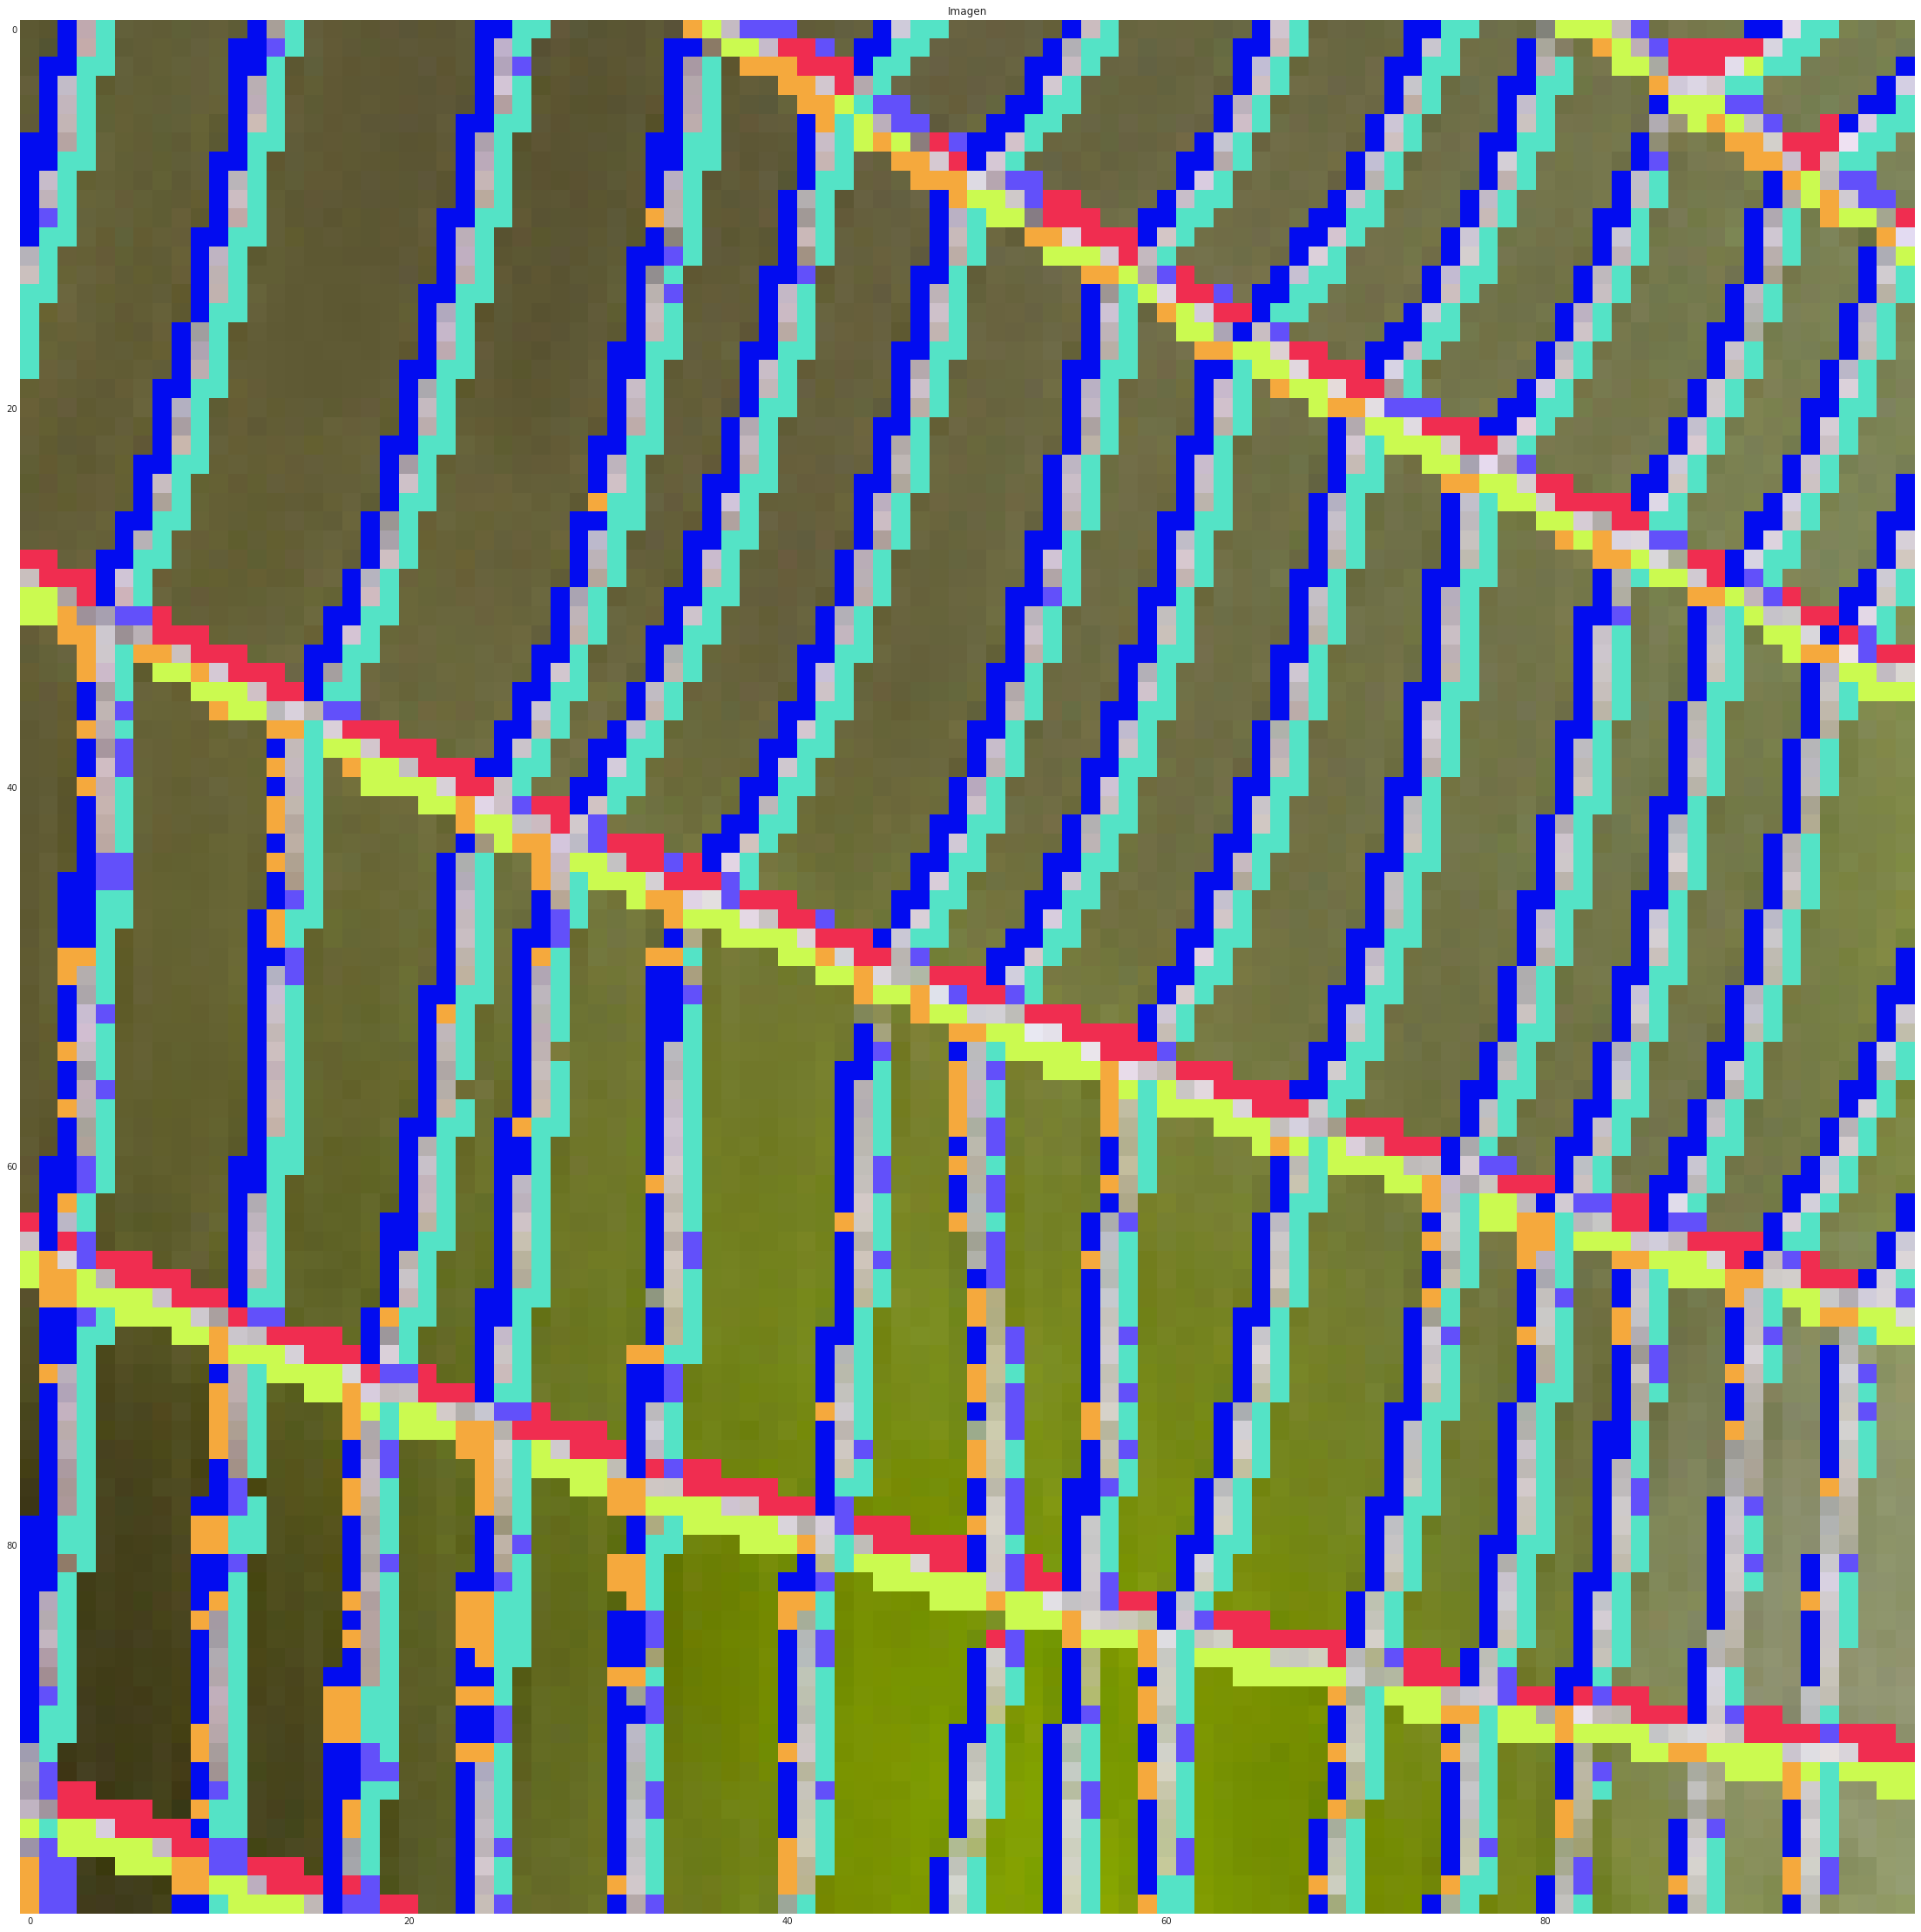

In [189]:
#Ampliamos la imagen para observar el detalle
plt.figure( figsize=(40,40))
plt.imshow(spydergrid_rgb[100:200,100:200])
plt.grid(False)
plt.title("Imagen")
plt.show()

Se observa que la deteccióndel borde es en general bastante buena, pero las direcciones de los gradientes se mezclan un poco entre los diferentes cuadrantes.